In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

%matplotlib inline

In [2]:
phi=np.linspace(0, 2*np.pi, 40)
theta = np.linspace(0, np.pi, 20)
PHI, THETA = np.meshgrid(phi, theta)


x=np.cos(PHI)*np.sin(THETA)
y=np.sin(PHI)*np.sin(THETA)
z=np.cos(THETA)

In [3]:
A=np.array([
    [4, 1, 4],
    [1, 4, 4],
    [4, 4, 1]
])

l, v = np.linalg.eig(A)


Q=A[0,0]*x**2+A[1,1]*y**2+A[2,2]*z**2+(A[0,1]+A[1,0])*x*y+(A[0,2]+A[2,0])*x*z+(A[1,2]+A[2,1])*y*z

Q_min=np.min(l)
Q_max=np.max(l)

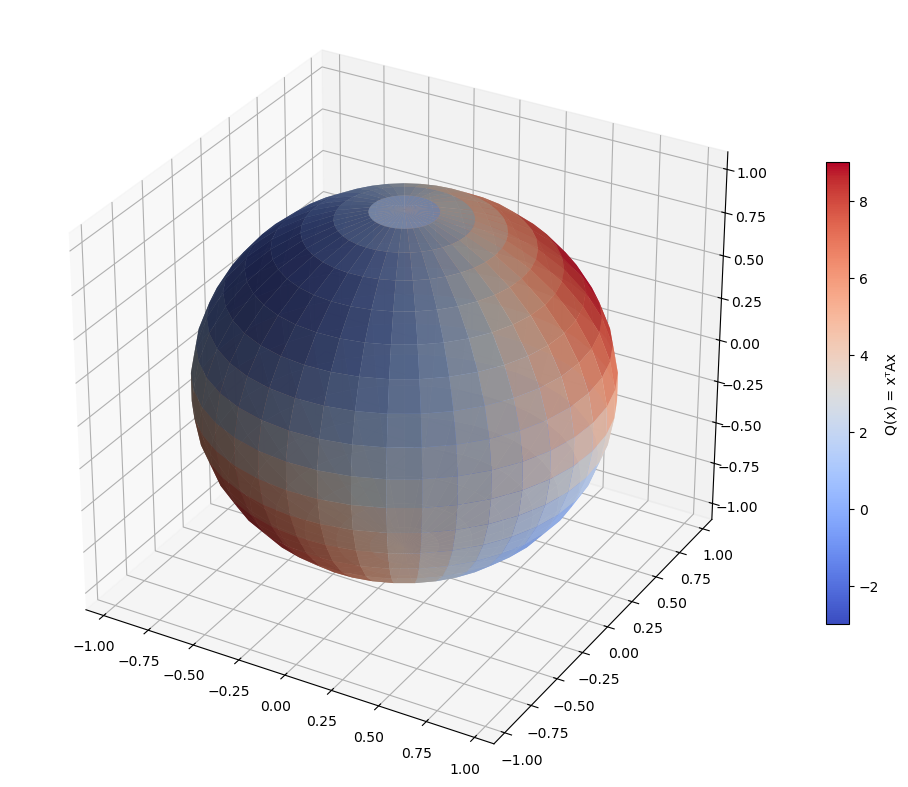

In [4]:
# --- Plotting ---
fig = plt.figure(figsize=(11, 8)) # Slightly wider figure for legend
ax = fig.add_subplot(111, projection='3d')

# Normalize Q values for coloring
norm = mcolors.Normalize(vmin=Q_min, vmax=Q_max)
cmap = plt.get_cmap('coolwarm') # cool (blue) = min, warm (red) = max

# Plot the surface colored by Q(x)
surf = ax.plot_surface(x, y, z, facecolors=cmap(norm(Q)),
                       rstride=1, cstride=1,
                       linewidth=0, alpha=0.9)

# Add a color bar
mappable = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
mappable.set_array(Q)
# Explicitly provide the axes 'ax'
cbar = fig.colorbar(mappable, ax=ax, shrink=0.6, aspect=20, label='Q(x) = xᵀAx')



ax.set_aspect('equal')


ax.set_xlim([-1.1, 1.1]) # Slightly larger limits
ax.set_ylim([-1.1, 1.1])
ax.set_zlim([-1.1, 1.1])

plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust layout to make space for legend
plt.show()


In [5]:
plt.close()